<a id='index'></a>
# Facial Landmarks Detection

- **[Data](#data)**
- **[Training the CNN model](#training)**
    - [History of training and validation loss](#loss_plot)
- **[Testing and visualising predictions](#testing)**

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras import backend as K
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential, load_model
from keras.preprocessing.image import img_to_array
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Dense, Flatten, Activation, Dropout

from utils import load_data, plot_data

Using TensorFlow backend.


<a id='data'></a>
## Data
The data was taken from [Kaggle](https://www.kaggle.com/c/facial-keypoints-detection/data).

The training dataset contains several thousand  $96×96$  grayscale images of cropped human faces, along with each face's 15 corresponding facial keypoints (also called landmarks) that have been placed by hand, and recorded in  $(x,y)$  coordinates. 

In [3]:
X_train, y_train = load_data()

print("X_train.shape: {}".format(X_train.shape))
print(
    "y_train.shape: {}\ny_train.min: {:.3f}\ny_train.max: {:.3f}".format(
    y_train.shape, y_train.min(), y_train.max())
)

# Load testing set
X_test, _ = load_data(test=True)
print("\nX_test.shape: {}".format(X_test.shape))

X_train.shape: (2140, 96, 96, 1)
y_train.shape: (2140, 30)
y_train.min: -0.920
y_train.max: 0.996

X_test.shape: (1783, 96, 96, 1)


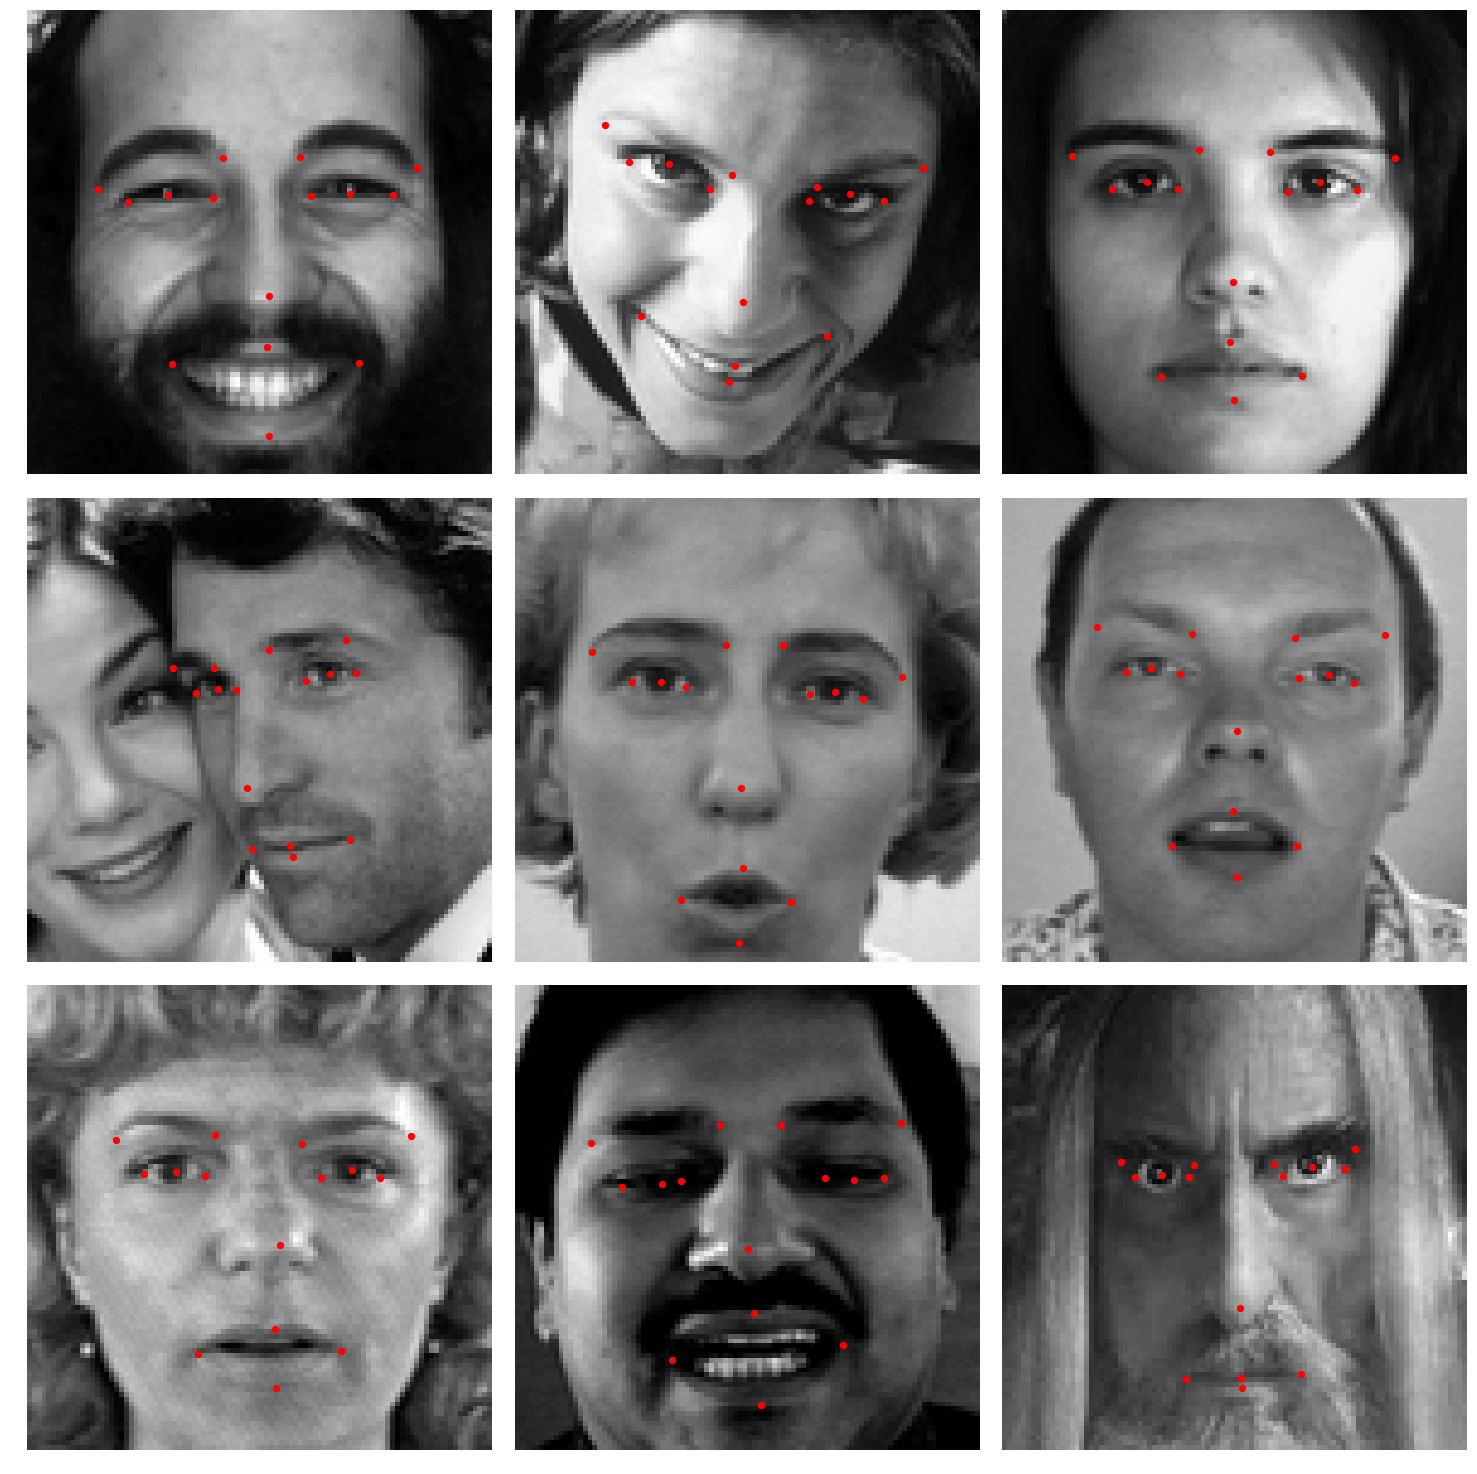

In [4]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(20,20))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(3):
    for j in range(3):
        plot_data(X_train[i*3 + j], y_train[i*3 + j], ax[i][j])
        ax[i][j].axis("off")

plt.show()

<a id='training'></a>
## Training the CNN model
[back to index](#index)

In [5]:
epochs = 100
batch_size = 32
height, width, depth = 96, 96, 1
input_shape = (height, width, depth)

if K.image_data_format() == 'channels_first':
    input_shape = (depth, height, width)

model = Sequential()
    
model.add(Conv2D(
    32, 
    (5, 5),
    padding="same",
    input_shape=input_shape
))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(
    64,
    (5, 5),
    padding="same"
))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(
    64,
    (5, 5),
    padding="same"
))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(
    32,
    (5, 5),
    padding="same"
))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(30))

model.compile(
    loss='mse',
    optimizer='adam',
    metrics=['mse', 'mae']
)

checkpointer = ModelCheckpoint(
    monitor='val_loss',
    filepath='model.h5', 
    verbose=1, 
    save_best_only=True
)

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    callbacks=[checkpointer]
)

Train on 1712 samples, validate on 428 samples
Epoch 1/100
1712/1712 [==============================] - 3s 2ms/step - loss: 0.0296 - mean_squared_error: 0.0296 - mean_absolute_error: 0.1132 - val_loss: 0.0181 - val_mean_squared_error: 0.0181 - val_mean_absolute_error: 0.1096

Epoch 00001: val_loss improved from inf to 0.01811, saving model to model.h5
Epoch 2/100
1712/1712 [==============================] - 1s 743us/step - loss: 0.0072 - mean_squared_error: 0.0072 - mean_absolute_error: 0.0648 - val_loss: 0.0132 - val_mean_squared_error: 0.0132 - val_mean_absolute_error: 0.0926

Epoch 00002: val_loss improved from 0.01811 to 0.01322, saving model to model.h5
Epoch 3/100
1712/1712 [==============================] - 1s 720us/step - loss: 0.0064 - mean_squared_error: 0.0064 - mean_absolute_error: 0.0608 - val_loss: 0.0101 - val_mean_squared_error: 0.0101 - val_mean_absolute_error: 0.0790

Epoch 00003: val_loss improved from 0.01322 to 0.01014, saving model to model.h5
Epoch 4/100
1712/171

<a id='loss_plot'></a>
### History of training and validation loss
[back to index](#index)

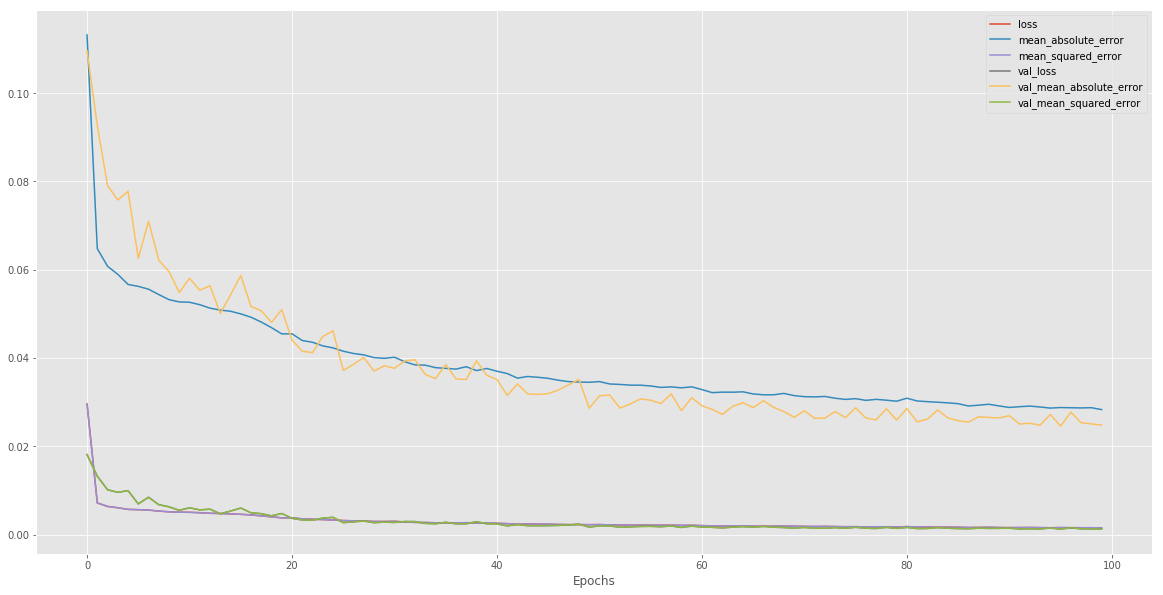

In [6]:
plt.style.use('ggplot')
pd.DataFrame(history.history).plot(figsize=(20, 10), markersize=14)
plt.xlabel('Epochs')
plt.show();

<a id='testing'></a>
## Testing and visualing predictions
[back to index](#index)

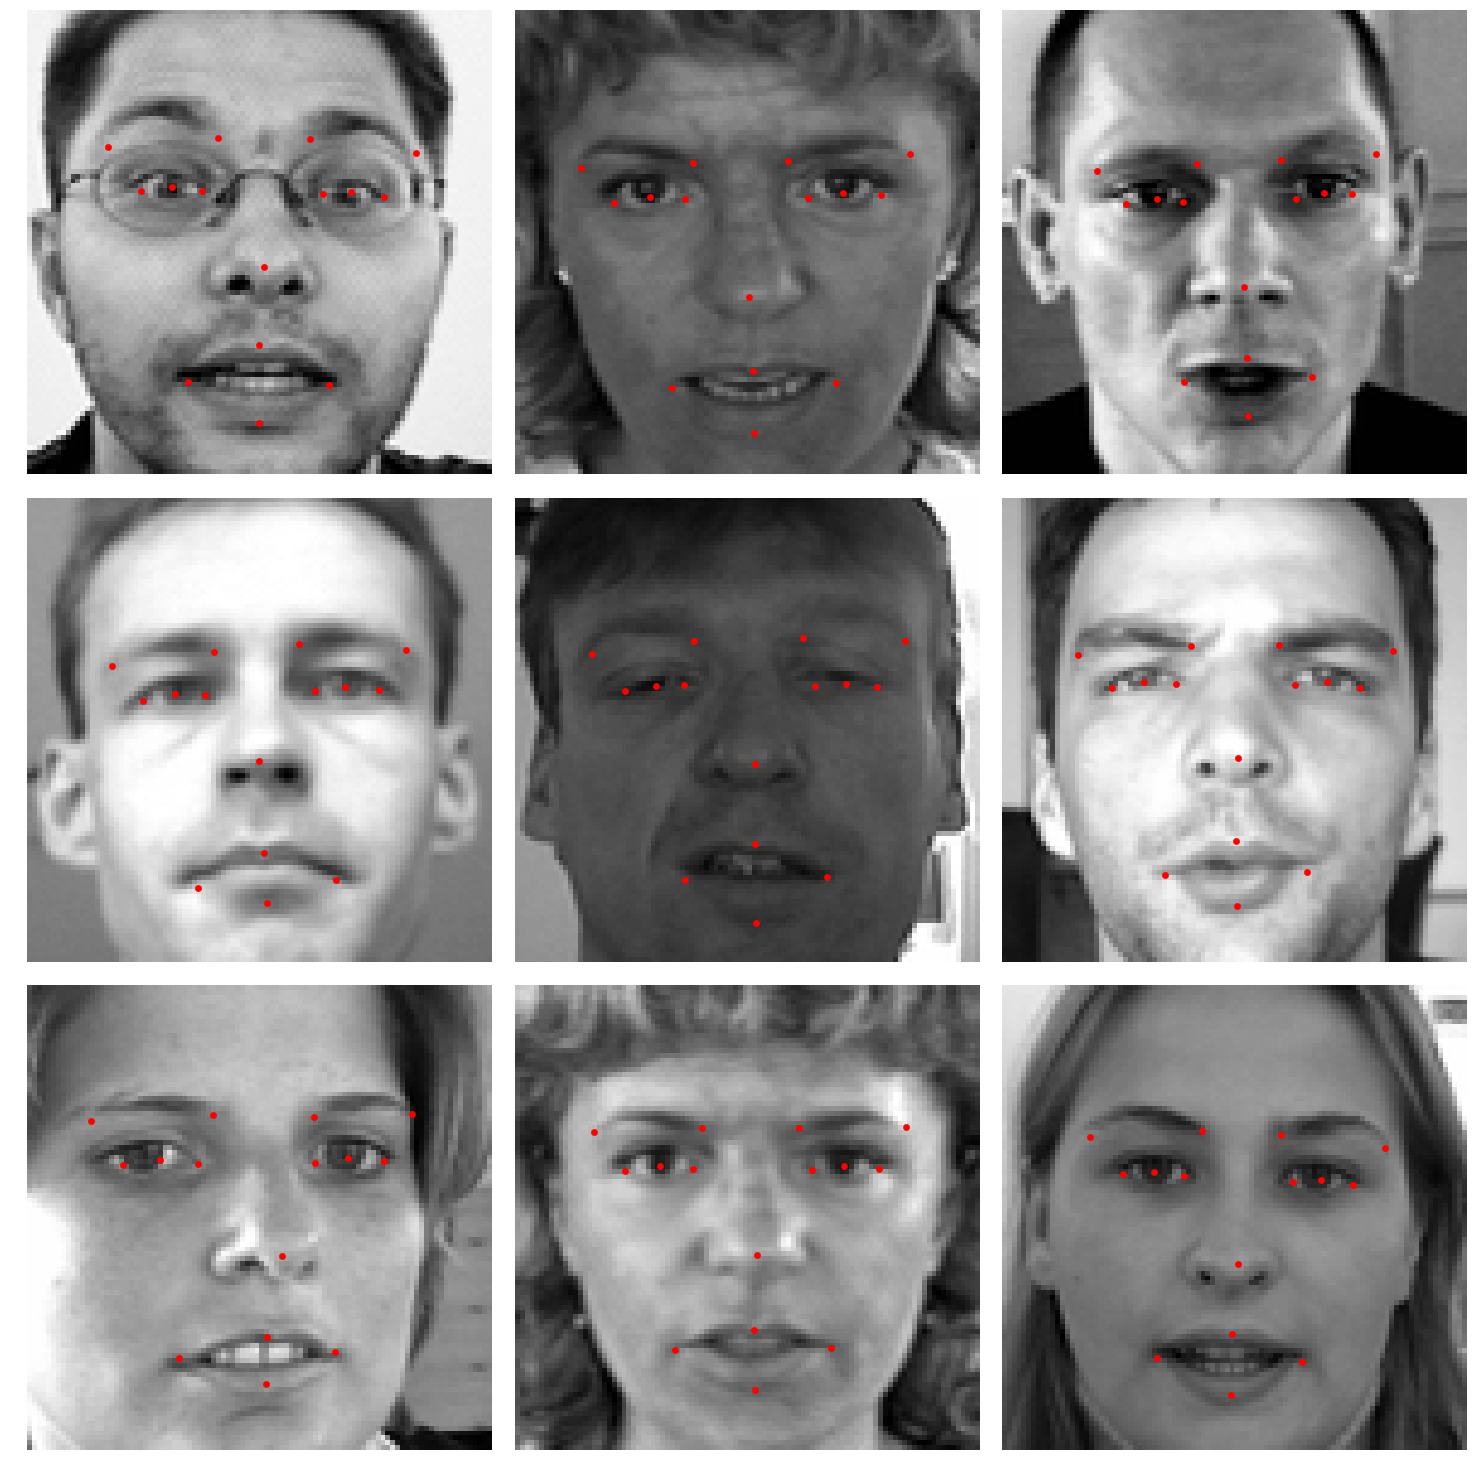

In [7]:
from keras.models import load_model

model = load_model('model.h5')
y_test = model.predict(X_test)

fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(20,20))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(3):
    for j in range(3):
        plot_data(X_test[i*3 + j], y_test[i*3 + j], ax[i][j]) 
        ax[i][j].axis('off')
        
plt.show()